In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('praxisprojekt/population.csv', error_bad_lines=False)
df = df.rename(columns={'Total population (Gapminder, HYDE & UN)':'Total_pop'})

In [3]:
df.head()

,Entity,Code,Year,Total_pop
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166


In [4]:
df.shape

(55656, 4)

In [5]:
#df.info()

In [6]:
#df.describe()

In [7]:
today_year = dt.date.today().year
#check if any data is from the future
df[df['Year']>today_year]

,Entity,Code,Year,Total_pop


In [8]:
#check if any data before 1960
df[df['Year']<1960]

,Entity,Code,Year,Total_pop
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166
...,...,...,...,...
55589,Zimbabwe,ZWE,1955,3213289
55590,Zimbabwe,ZWE,1956,3317282
55591,Zimbabwe,ZWE,1957,3425070
55592,Zimbabwe,ZWE,1958,3537167


In [9]:
#drop unwanted Years
df.drop(df[df['Year']<1960].index, inplace = True)
df.shape

(15048, 4)

<ipython-input-32-1bee66eae392>:2: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(df.Year.unique(),10)


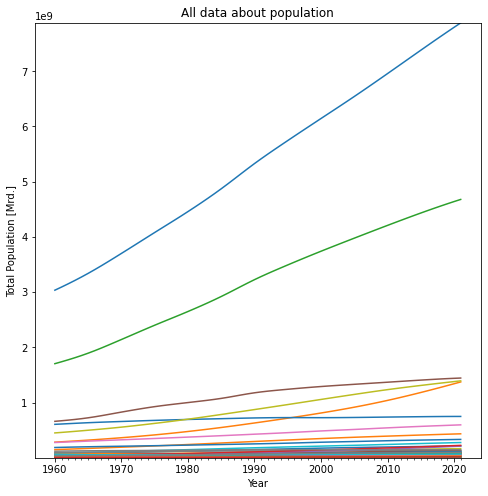

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xticks(df.Year.unique(),10)
df.groupby(["Year", "Entity"]).mean().unstack().plot(ax=ax)
ax.set_ylim([df['Total_pop'].min(), df['Total_pop'].max()])
ax.set_ylabel('Total Population [Mrd.]')
ax.get_legend().remove()
ax.title.set_text('All data about population')
plt.show()

In [11]:
df.groupby(["Year", "Entity"]).mean()

Total_pop
Year Entity                    
1960 Afghanistan        8996967
     Africa           283361169
     Albania            1636091
     Algeria           11057864
     American Samoa       20127
...                         ...
2021 Western Sahara      611872
     World           7874965730
     Yemen             30490639
     Zambia            18920657
     Zimbabwe          15092171

[15048 rows x 1 columns]

In [25]:
df['Total_pop'].max()

7874965730